In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
import numpy as np

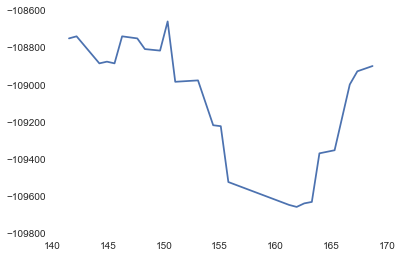

In [16]:
plt.plot(np.array([ 141.46,  142.14,  144.18,  144.86,  145.54,  146.22,  147.58,
        148.26,  149.62,  150.3 ,  150.98,  153.02,  154.38,  155.06,
        155.74,  161.18,  161.86,  162.54,  163.22,  163.9 ,  165.26,
        166.62,  167.3 ,  168.66]), np.array([-108744.079545  , -108732.919518  , -108878.33170286,
       -108869.15139514, -108878.33170286, -108732.919518  ,
       -108744.079545  , -108801.53108171, -108809.72386571,
       -108652.76930043, -108977.36619829, -108969.841675  ,
       -109210.920819  , -109216.06693943, -109516.32111786,
       -109639.29751143, -109650.09559029, -109631.05412286,
       -109623.22851386, -109361.98050614, -109345.38794471,
       -108991.76056214, -108920.92648243, -108892.59587514]))

In [4]:
with open("stuff.pkl") as f:
    y, l = pickle.load(f)

In [5]:
from scipy.signal import argrelextrema

In [6]:
mins = argrelextrema(l, np.less, order = 30)[0]
maxes = argrelextrema(l, np.greater, order = 30)[0]

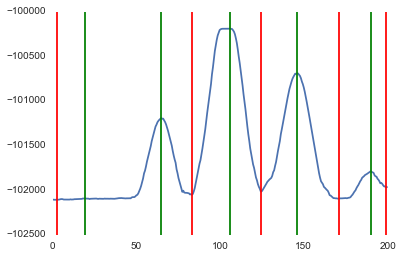

In [7]:
plt.plot(y, l)
[plt.axvline(x = value, color="r") for value in y[mins]]
[plt.axvline(x = value, color="g") for value in y[maxes]]
plt.show()

In [8]:
with open("x_extrema.pkl") as f:
    xpos, smoothed_x, x_min, x_max = pickle.load(f)

In [9]:
with open("y_extrema.pkl") as f:
    ypos, smoothed_y, y_min, y_max = pickle.load(f)

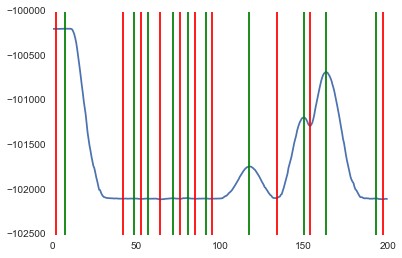

In [10]:
plt.plot(xpos, smoothed_x)
[plt.axvline(x = value, color="r") for value in x_min]
[plt.axvline(x = value, color="g") for value in x_max]
plt.show()

In [11]:
def compute_intervals(mins, maxes):
    points = []
    start = None
    stop = None
    min_index = 0
    max_index = 0
    encountered_peak = False
    
    #start and stop should have at least one peak between them
    #start and stop are the locations of a min
    
    while min_index < mins.shape[0] and max_index < maxes.shape[0]:
        if start is None:
            start = mins[min_index]
            min_index += 1
        if not encountered_peak and maxes[max_index] < start:
            #the peak we are at is behind our start, so we need to find the next one
            max_index += 1
        if not encountered_peak and maxes[max_index] > start:
            #select the first peak we encounter, then try to find the next min to close off this segment
            encountered_peak = True
            max_index += 1
        if encountered_peak and min_index < mins.shape[0]:
            stop = mins[min_index]
            points.append([start, stop])
            start = None
            stop = None
        
    return np.array(points)

In [12]:
def uniqueish_color():
    """There're better ways to generate unique colors, but this isn't awful."""
    return plt.cm.gist_ncar(np.random.random())

[[  2  42]
 [ 42  52]
 [ 52  64]
 [ 64  76]
 [ 76  84]
 [ 84  95]
 [ 95 134]
 [134 154]
 [154 197]]


NameError: name 'x' is not defined

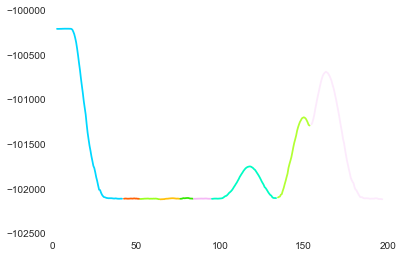

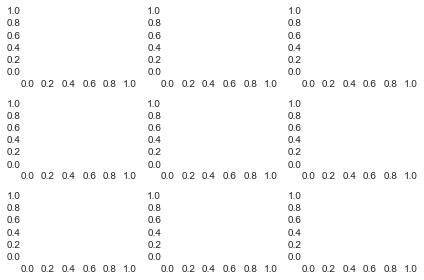

In [13]:
intervals = compute_intervals(x_min, x_max)
intervals = np.floor(intervals).astype("int")
fig, ax = plt.subplots()
for start,stop in intervals:
    lower_mask = xpos > start
    upper_mask = xpos < stop
    mask = np.logical_and(lower_mask, upper_mask)
    ax.plot(xpos[mask], smoothed_x[mask], color=uniqueish_color())
    
print intervals
plt.figure(figsize=(10,10))
f, ax = plt.subplots(3,3)
f.tight_layout()
counter = 0
for sublst in ax:
    for subplot in sublst:
        if counter >= intervals.shape[0]:
            continue
        start,stop = intervals[counter]
        counter += 1
        mask = np.where(( x > start) & (x < stop))[0]
        #mask = np.ones(len(ypos),dtype='bool')
        #mask *= xpos > start
        #mask *= xpos < stop
        #lower_mask = xpos > start
        #upper_mask = xpos < stop
        #mask = np.logical_and(lower_mask, upper_mask)
        subplot.plot(y[mask], L[mask], marker=',',color=uniqueish_color())
        #subplot.plot(ypos, smoothed_y, color=uniqueish_color())
        subplot.set_title("%d - %d"%(start,stop))
        #subplot.set_xlim(0,200)

In [ ]:
plt.figure(figsize=(20,20))
f, ax = plt.subplots(3,3)
f.tight_layout()
counter = 0
for sublst in ax:
    for subplot in sublst:
        if counter >= intervals.shape[0]:
            continue
        start,stop = intervals[counter]
        counter += 1
        mask = np.where(( x > start) & (x < stop))[0]
        #mask = np.ones(len(ypos),dtype='bool')
        #mask *= xpos > start
        #mask *= xpos < stop
        #lower_mask = xpos > start
        #upper_mask = xpos < stop
        #mask = np.logical_and(lower_mask, upper_mask)
        subplot.plot(y[mask], L[mask], ',',color=uniqueish_color())
        #subplot.plot(ypos, smoothed_y, color=uniqueish_color())
        subplot.set_title("%d - %d"%(start,stop))
        #subplot.set_xlim(0,200)

In [ ]:
def random_color():
    return plt.cm.gist_ncar(np.random.random())
def plot_segments(locs, vals, min_vals, max_vals):
    intervals = compute_intervals(min_vals, max_vals)
    intervals = np.floor(intervals).astype("int")
    fig, ax = plt.subplots()
    for x,y in intervals:
        lower_mask = locs > x
        upper_mask = locs < y
        mask = np.logical_and(lower_mask, upper_mask)
        ax.plot(locs[mask], vals[mask], color=uniqueish_color())

In [ ]:
plot_segments(xpos, smoothed_x, x_min, x_max)

In [ ]:
plot_segments(ypos, smoothed_y, y_min, y_max)

In [ ]:
import plot_results

In [ ]:
x = plot_results.x
y = plot_results.y
a = plot_results.a
r = plot_results.r
L = plot_results.L

width = plot_results.width
height = plot_results.height

In [ ]:
intervals

In [ ]:
intervals = compute_intervals(x_min, x_max)
intervals = np.floor(intervals).astype("int")
fig, ax = plt.subplots()
for start,stop in intervals:
    lower_mask = xpos > start
    upper_mask = xpos < stop
    mask = np.logical_and(lower_mask, upper_mask)
    ax.plot(xpos[mask], smoothed_x[mask], color=uniqueish_color())
    
plt.figure(figsize=(10,10))
f, ax = plt.subplots(3,3)
f.tight_layout()
counter = 0
for sublst in ax:
    for subplot in sublst:
        if counter >= intervals.shape[0]:
            continue
        start,stop = intervals[counter]
        counter += 1
        lower_mask = x > start
        upper_mask = x < stop
        mask = np.logical_and(lower_mask, upper_mask)

        w, mask, bins, lval = envelope = plot_results.binned_max(y[mask], L[mask], start, stop, 50)
        smoothed = plot_results.smooth(lval[mask])
        mins = plot_results.compute_mins(bins[mask], smoothed)
        maxes = plot_results.compute_maxes(bins[mask], smoothed)
        
        subplot.plot(bins[mask], smoothed)
        #plot_results.plot_segments(subplot, bins[mask], smoothed, mins, maxes)

In [ ]:
intervals = compute_intervals(x_min, x_max)
intervals = np.floor(intervals).astype("int")
fig, ax = plt.subplots()
for start,stop in intervals:
    lower_mask = xpos > start
    upper_mask = xpos < stop
    mask = np.logical_and(lower_mask, upper_mask)
    ax.plot(xpos[mask], smoothed_x[mask], color=uniqueish_color())

ax.set_title("Peaks in X vs L colored by segment")
    
plt.figure(figsize=(30,30))
f, ax = plt.subplots(3,3)
f.tight_layout(pad=2, w_pad = 2, h_pad = 2)
counter = 0
for sublst in ax:
    for subplot in sublst:
        if counter >= intervals.shape[0]:
            continue
        start,stop = intervals[counter]
        counter += 1
        lower_mask = x > start
        upper_mask = x < stop
        mask = np.logical_and(lower_mask, upper_mask)

        w, mask, bins, lval = envelope = plot_results.binned_max(y[mask], L[mask], start, stop, 100)
        smoothed = plot_results.smooth(lval[mask])
        mins = plot_results.compute_mins(bins[mask], smoothed, window_size = 5)
        maxes = plot_results.compute_maxes(bins[mask], smoothed, window_size = 5)
        my_interval = compute_intervals(mins, maxes)
        my_interval = np.floor(my_interval).astype("int")

        for t_start, t_stop in my_interval:
            l_mask = bins > t_start 
            u_mask = bins < t_stop
            temp_mask = np.logical_and(l_mask, u_mask)
            subplot.plot(bins[temp_mask], lval[temp_mask], color=random_color())
            subplot.set_title("Plot of Y vs L in x range (%d, %d)"%(t_start, t_stop))
        
        #subplot.plot(bins[mask], smoothed)
        #plot_results.plot_segments(subplot, bins[mask], smoothed, mins, maxes)